In [1]:
import pandas as pd
import numpy as np
import altair as alt
alt.data_transformers.enable('csv')

DataTransformerRegistry.enable('csv')

In [62]:
df = pd.read_csv(r"C:\Users\Administrator\Repositories\logdeep\result\deeplog\times_result.csv")

In [63]:
df1 = pd.read_csv(r"C:\Users\Administrator\Repositories\GreenSecurity-FirstExperiment\Dell Inc. Latitude Latitude 7430 Windows 10\LogAnomalyDetection\Power Saver Plan\One Scan\Measurement 26\processes_data.csv")

In [64]:
df1 = df1[df1["PID"] == 9412]
df1

,Time(sec),PID,PNAME,CPU(%),NUM THREADS,MEMORY(MB),MEMORY(%),READ_IO(#),WRITE_IO(#),READ_IO(KB),WRITE_IO(KB)
222,1.671787e+09,9412,python.exe,8.17,12,233.438,1.48,3908,0,31711.527,0.000
445,1.671787e+09,9412,python.exe,8.30,12,235.238,1.49,0,0,0.000,0.000
669,1.671787e+09,9412,python.exe,7.92,21,181.355,1.15,100,10,773.700,1.035
892,1.671787e+09,9412,python.exe,8.04,21,181.355,1.15,0,0,0.000,0.000
1115,1.671787e+09,9412,python.exe,7.74,21,181.355,1.15,0,0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
26847,1.671788e+09,9412,python.exe,7.97,18,204.145,1.29,0,0,0.000,0.000
27065,1.671788e+09,9412,python.exe,8.15,18,206.180,1.30,0,0,0.000,0.000
27283,1.671788e+09,9412,python.exe,7.83,19,208.312,1.32,0,0,0.000,0.000
27501,1.671788e+09,9412,python.exe,8.03,19,210.398,1.33,0,0,0.000,0.000


In [65]:
df

,Unnamed: 0,start_time,logs_seq,new_log,dataset_type,end_time
0,0,1.671787e+09,"[4.0, 4.0, 4.0, 21.0, 10.0, 8.0, 10.0, 8.0, 10...",[25],normal,1.671787e+09
1,0,1.671787e+09,"[4.0, 4.0, 21.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8...",[25],normal,1.671787e+09
2,0,1.671787e+09,"[4.0, 21.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 2...",[25],normal,1.671787e+09
3,0,1.671787e+09,"[21.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 25.0, ...",[22],normal,1.671787e+09
4,0,1.671787e+09,"[10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 25.0, 25.0, ...",[22],normal,1.671787e+09
...,...,...,...,...,...,...
280600,49048,1.671788e+09,"[2.0, 3.0, 24.0, 17.0, 4.0, 15.0, 5.0, 25.0, 2...",[24],abnormal,1.671788e+09
280601,49049,1.671788e+09,"[3.0, 24.0, 17.0, 4.0, 15.0, 5.0, 25.0, 25.0, ...",[4],abnormal,1.671788e+09
280602,49050,1.671788e+09,"[4.0, 21.0, 4.0, 4.0, 10.0, 8.0, 25.0, 25.0, 1...",[10],abnormal,1.671788e+09
280603,49051,1.671788e+09,"[21.0, 4.0, 4.0, 10.0, 8.0, 25.0, 25.0, 10.0, ...",[8],abnormal,1.671788e+09


In [66]:
df1 = df1.reset_index()

In [67]:
df.assign(cpu=[0]*len(df)) 
for i, row in df1.iterrows():
    cpu = row["CPU(%)"]
    start_time_df1 = row["Time(sec)"]
    if i == len(df1)-1:
        end_time_df1 = start_time_df1 +20
    else:
        end_time_df1 = df1.iloc[i+1]["Time(sec)"]
    view = df[(df["start_time"]>=start_time_df1)&(df["end_time"]<=end_time_df1)]
    if len(view):
        df.loc[view.index, "cpu"] = cpu/len(view)
df["time"] = df["end_time"] - df.iloc[0]["start_time"]

In [68]:
df

,Unnamed: 0,start_time,logs_seq,new_log,dataset_type,end_time,cpu,time
0,0,1.671787e+09,"[4.0, 4.0, 4.0, 21.0, 10.0, 8.0, 10.0, 8.0, 10...",[25],normal,1.671787e+09,0.013765,0.033000
1,0,1.671787e+09,"[4.0, 4.0, 21.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8...",[25],normal,1.671787e+09,0.013765,0.048000
2,0,1.671787e+09,"[4.0, 21.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 2...",[25],normal,1.671787e+09,0.013765,0.052001
3,0,1.671787e+09,"[21.0, 10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 25.0, ...",[22],normal,1.671787e+09,0.013765,0.056000
4,0,1.671787e+09,"[10.0, 8.0, 10.0, 8.0, 10.0, 8.0, 25.0, 25.0, ...",[22],normal,1.671787e+09,0.013765,0.060001
...,...,...,...,...,...,...,...,...
280600,49048,1.671788e+09,"[2.0, 3.0, 24.0, 17.0, 4.0, 15.0, 5.0, 25.0, 2...",[24],abnormal,1.671788e+09,0.001688,613.240009
280601,49049,1.671788e+09,"[3.0, 24.0, 17.0, 4.0, 15.0, 5.0, 25.0, 25.0, ...",[4],abnormal,1.671788e+09,0.001688,613.242000
280602,49050,1.671788e+09,"[4.0, 21.0, 4.0, 4.0, 10.0, 8.0, 25.0, 25.0, 1...",[10],abnormal,1.671788e+09,0.001688,613.244000
280603,49051,1.671788e+09,"[21.0, 4.0, 4.0, 10.0, 8.0, 25.0, 25.0, 10.0, ...",[8],abnormal,1.671788e+09,0.001688,613.245999


In [57]:
isna = df[df.dataset_type=='normal'][df.cpu.isna()]
isna

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9744\3927356785.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  isna = df[df.dataset_type=='normal'][df.cpu.isna()]


,Unnamed: 0,start_time,logs_seq,new_log,dataset_type,end_time,cpu,time


In [69]:
df.cpu = df.cpu.fillna(df.cpu.mean())

In [70]:
normal = df[df['dataset_type']=="abnormal"]
# group_normal = normal.groupby('cpu').count().reset_index()
alt.Chart(normal).mark_bar().encode(
    alt.X("cpu:Q"),
    y='count()',
)

c:\Users\Administrator\.conda\envs\py310\lib\site-packages\altair\utils\core.py:283: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

<AxesSubplot: >

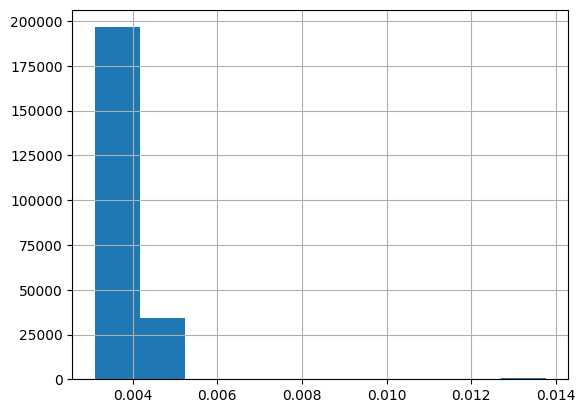

In [72]:
df[df['dataset_type']=="normal"]['cpu'].hist()

<AxesSubplot: >

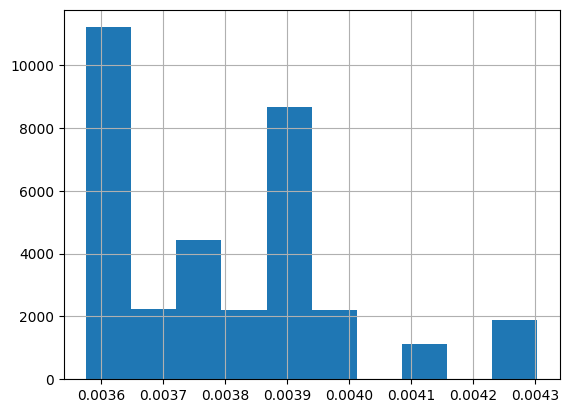

In [ ]:
df[df['dataset_type']=="abnormal"].cpu.hist()

In [33]:
q = df["cpu"].quantile(0.99)
df = df[df["cpu"] < q]

In [37]:
df["duration"] = df["end_time"] - df['start_time']
group_df = df.groupby(["logs_seq", "new_log","dataset_type"]).aggregate(['count','min','max']).reset_index()
group_df

logs_seq new_log dataset_type  \
                                                                                
0      [1.0, 1.0, 1.0, 3.0, 2.0, 2.0, 3.0, 2.0, 22.0,...    [22]       normal   
1      [1.0, 1.0, 1.0, 3.0, 2.0, 3.0, 22.0, 22.0, 22....    [20]       normal   
2      [1.0, 1.0, 1.0, 3.0, 2.0, 3.0, 3.0, 3.0, 22.0,...    [22]       normal   
3      [1.0, 1.0, 1.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, ...     [3]       normal   
4      [1.0, 1.0, 1.0, 3.0, 3.0, 2.0, 22.0, 22.0, 22....    [20]       normal   
...                                                  ...     ...          ...   
28216  [8.0, 8.0, 8.0, 25.0, 25.0, 25.0, 3.0, 2.0, 3....    [22]       normal   
28217  [8.0, 8.0, 8.0, 25.0, 25.0, 25.0, 3.0, 3.0, 2....    [22]       normal   
28218  [8.0, 8.0, 8.0, 25.0, 3.0, 2.0, 3.0, 1.0, 1.0,...    [22]       normal   
28219  [8.0, 8.0, 8.0, 3.0, 2.0, 3.0, 1.0, 1.0, 1.0, ...    [22]       normal   
28220  [8.0, 8.0, 8.0, 3.0, 2.0, 3.0, 1.0, 1.0, 22.0,...    [22]       normal   

      Unnamed: 0               start_time                              \
           count    min    max      count           min           max   
0              1   8001   8001          1  1.671712e+09  1.671712e+09   
1             25     58  15236         25  1.671712e+09  1.671712e+09   
2              1   1221   1221          1  1.671712e+09  1.671712e+09   
3             12   2185  14987         12  1.671712e+09  1.671712e+09   
4             39    686  14365         39  1.671712e+09  1.671712e+09   
...          ...    ...    ...        ...           ...           ...   
28216          1  11952  11952          1  1.671712e+09  1.671712e+09   
28217          1  13425  13425          1  1.671712e+09  1.671712e+09   
28218          1  10806  10806          1  1.671712e+09  1.671712e+09   
28219          1   9657   9657          1  1.671712e+09  1.671712e+09   
28220          1   7460   7460          1  1.671712e+09  1.671712e+09   

      end_time                               cpu                     duration  \
         count           min           max count       min       max    count   
0            1  1.671712e+09  1.671712e+09     1  0.004734  0.004734        1   
1           25  1.671712e+09  1.671712e+09    25  0.004087  0.005779       25   
2            1  1.671712e+09  1.671712e+09     1  0.004765  0.004765        1   
3           12  1.671712e+09  1.671712e+09    12  0.004064  0.006218       12   
4           39  1.671712e+09  1.671712e+09    39  0.003994  0.005416       39   
...        ...           ...           ...   ...       ...       ...      ...   
28216        1  1.671712e+09  1.671712e+09     1  0.004289  0.004289        1   
28217        1  1.671712e+09  1.671712e+09     1  0.004118  0.004118        1   
28218        1  1.671712e+09  1.671712e+09     1  0.004424  0.004424        1   
28219        1  1.671712e+09  1.671712e+09     1  0.004692  0.004692        1   
28220        1  1.671712e+09  1.671712e+09     1  0.004064  0.004064        1   

                           
            min       max  
0      0.002011  0.002011  
1      0.000999  0.003001  
2      0.001967  0.001967  
3      0.000954  0.003001  
4      0.000968  0.002996  
...         ...       ...  
28216  0.001961  0.001961  
28217  0.001952  0.001952  
28218  0.001998  0.001998  
28219  0.001972  0.001972  
28220  0.001919  0.001919  

[28221 rows x 18 columns]